In [1]:
## PREP THE DATA
# 0. import packages
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import re
import seaborn as sns

%matplotlib inline

In [2]:
# 2. create 3 datasets: hulu, amazon, netflix
netflix_all = pd.read_csv("netflix_dataset.csv")
amazon_all = pd.read_csv("amazon_dataset.csv")
hulu_all = pd.read_csv("hulu_dataset.csv")

netflix_all = netflix_all.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Position'], axis=1)
amazon_all = amazon_all.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Position'], axis=1)
hulu_all = hulu_all.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Position'], axis=1)

In [3]:
# 3. create 1 dataset: all movies non-duplicates
all_listed = [netflix_all, amazon_all, hulu_all]

all_titles = pd.concat(all_listed, ignore_index=True)
all_titles_deDupe = all_titles.drop(["Genre"], axis=1).drop_duplicates()
all_titles_noMissing = all_titles.drop(["Genre"], axis=1).drop_duplicates()
netflix_deDupe = all_titles_deDupe[all_titles_deDupe["Service"] == "netflix"]
amazon_deDupe = all_titles_deDupe[all_titles_deDupe["Service"] == "amazon"]
hulu_deDupe = all_titles_deDupe[all_titles_deDupe["Service"] == "hulu"]
overall_means = all_titles.groupby(by=all_titles["Service"]).mean()
overall_medians = all_titles.groupby(by=all_titles["Service"]).median()

# genre tables for plotting
action = all_titles[all_titles["Genre"] == "action"]
comedy = all_titles[all_titles["Genre"] == "comedy"]
documentary = all_titles[all_titles["Genre"] == "documentary"]
drama = all_titles[all_titles["Genre"] == "drama"]
family = all_titles[all_titles["Genre"] == "family"]
horror = all_titles[all_titles["Genre"] == "horror"]
romance = all_titles[all_titles["Genre"] == "romance"]
scifi = all_titles[all_titles["Genre"] == "scifi"]
thriller = all_titles[all_titles["Genre"] == "thriller"]

# RottenTomatoes 75% datasets
all_titles_rt75 = all_titles[all_titles["RottenTomatoes"] >= 0.75]
action_rt75 = action[action["RottenTomatoes"] >= 0.75]
comedy_rt75 = comedy[comedy["RottenTomatoes"] >= 0.75]
documentary_rt75 = documentary[documentary["RottenTomatoes"] >= 0.75]
drama_rt75 = drama[drama["RottenTomatoes"] >= 0.75]
family_rt75 = family[family["RottenTomatoes"] >= 0.75]
horror_rt75 = horror[horror["RottenTomatoes"] >= 0.75]
romance_rt75 = romance[romance["RottenTomatoes"] >= 0.75]
scifi_rt75 = scifi[scifi["RottenTomatoes"] >= 0.75]
thriller_rt75 = thriller[thriller["RottenTomatoes"] >= 0.75]


# Introduction

### For my project, I scraped critic ratings (Rotten Tomatoes) and audience ratings (IMDb) for all movies currently streaming on:
1. Netflix
2. Amazon Prime
3. Hulu
<br><br>
<i>Scraping method: Selenium</i><br>
<i>Source: reelgood.com</i>
<br>

# Questions I wanted to answer...
<br>
##### 1. Which streaming service provides the most movie content for your money?
<br>
##### 2. Which service has the most quality movie content overall?
<br>
##### 3. Which service has the most quality movie content per genre?
<br>

# Quantitative Analysis: 
# Which streaming service has the most movie content in their inventory?
<br><br>
#### ... Any guesses?
<br>

# Total Movie Inventory by Service

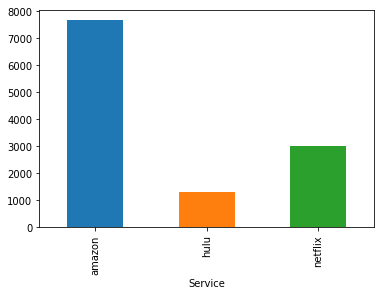

In [5]:
# total movie count by service
all_titles_noMissing["Title"].groupby(by=all_titles_noMissing["Service"]).count().plot.bar()

### - Amazon Prime has more than double the inventory of Netflix's movie library, and nearly 6x Hulu's!

# Quantitative Analysis: 
# What is the distribution of content by genre for each streaming service?
<br>

# Amazon Prime

Text(0.5,1,'Amazon Movie Inventory by Genre')

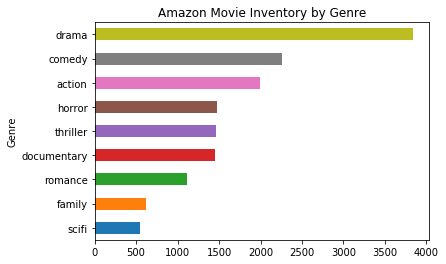

In [19]:
# amazon movie count by service broken down by genre
amazon_genre_bars = amazon_all["Title"].groupby(by=amazon_all["Genre"]).count().sort_values().plot.barh()
plt.title("Amazon Movie Inventory by Genre")

# Netflix

Text(0.5,1,'Netflix Movie Inventory by Genre')

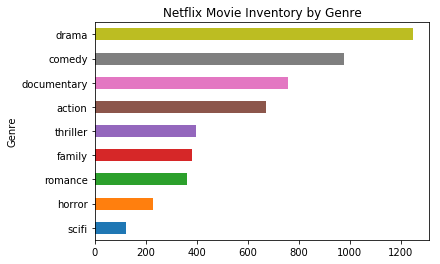

In [21]:
netflix_all["Title"].groupby(by=netflix_all["Genre"]).count().sort_values().plot.barh()
plt.title("Netflix Movie Inventory by Genre")

### - All three services load their libraries with dramas and comedies<br>
### - Netflix's library has large proportion of documentaries relative to the other services, but Amazon Prime still has more than double the documentaries of Netflix

# Hulu

Text(0.5,1,'Hulu Movie Inventory by Genre')

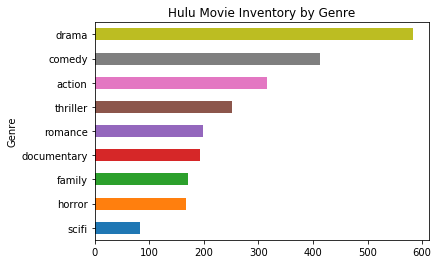

In [23]:
# hulu movie count by service broken down by genre
hulu_all["Title"].groupby(by=hulu_all["Genre"]).count().sort_values().plot.barh()
plt.title("Hulu Movie Inventory by Genre")

# Qualitative Analysis:
# Is there a significant difference in the quality of each service's movie content? 
<br>
### Boxplots: Audience rating distributions by streaming service <br>
### Box charts: Count of Rotten Tomato ratings above 75% for each service
<i> * Rotten Tomatoes labels Movies and TV shows "Certified Fresh" with a steady Tomatometer of 75% or higher after a set amount of reviews</i>
<br><br>
First, let's look at the overall content based on Rotten Tomato and IMDb ratings...
<br>

# IMDb Ratings (Overall)

                Year      IMDb
Service                       
amazon   1999.017729  0.580676
hulu     2008.203802  0.611740
netflix  2011.557072  0.635365


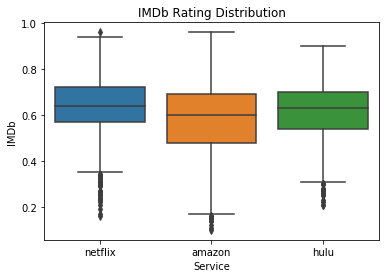

In [4]:
sns.boxplot(x = "Service", y="IMDb", data=all_titles_noMissing)
plt.title("IMDb Rating Distribution")
print(all_titles_noMissing.drop(["RottenTomatoes"], axis=1).groupby("Service").mean())

### Netflix has the highest quality movie content overall, according to IMBb users.

# Rotten Tomato Ratings (Overall)

             IMDb  RottenTomatoes
Service                          
amazon   0.580676        0.626676
hulu     0.611740        0.611698
netflix  0.635365        0.661669


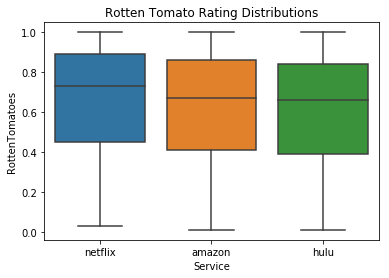

In [16]:
sns.boxplot(x = "Service", y="RottenTomatoes", data=all_titles_noMissing)
plt.title("Rotten Tomato Rating Distributions")
print(all_titles_noMissing.drop("Year", axis=1).groupby("Service").mean())

#### Critics and viewers agree: Netflix has the highest quality movie content of the bunch.

Text(0.5,1,'Title Count of Rotten Tomato Scores >= 75%')

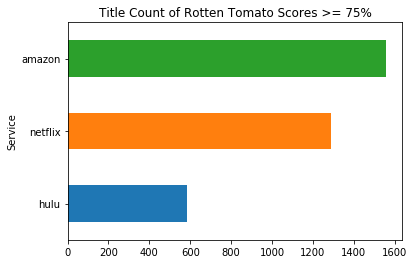

In [7]:
all_titles_rt75["Title"].groupby(by=all_titles_rt75["Service"]).count().sort_values().plot.barh()
plt.title("Title Count of Rotten Tomato Scores >= 75%")

#### - 20% of Amazon Prime's movie library is rated 75% or better on Rotten Tomatoes 
#### - 43% of Netflix's movie library is rated 75% or better on Rotten Tomatoes**
#### - 44% of Hulu's movie library is rated 75% or better on Rotten Tomatoes


# Action

                Year      IMDb
Service                       
amazon   1991.303167  0.537436
hulu     2005.739683  0.589135
netflix  2010.794948  0.604911


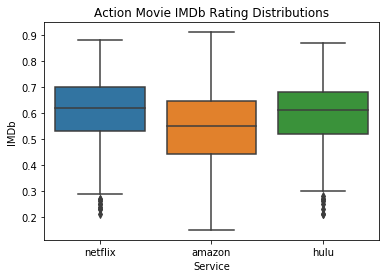

In [5]:
sns.boxplot(x = "Service", y = "IMDb", data= action)
plt.title("Action Movie IMDb Rating Distributions")
print(action.drop(["RottenTomatoes"], axis=1).groupby("Service").mean())

         Title
Service       
amazon    1989
hulu       315
netflix    673


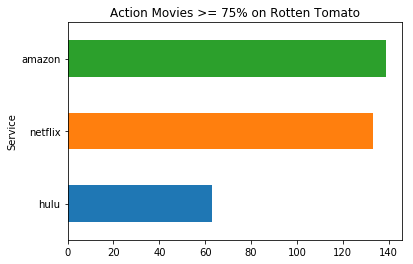

In [8]:
action_rt75["Title"].groupby(by=action_rt75["Service"]).count().sort_values().plot.barh()
plt.title("Action Movies >= 75% on Rotten Tomato")
print(all_titles[all_titles["Genre"]=="action"].drop(["IMDb","RottenTomatoes","Year","Genre"], axis=1).groupby("Service").count())

# Horror

                Year      IMDb
Service                       
amazon   2000.858305  0.444263
hulu     2009.862275  0.500361
netflix  2013.305677  0.521667


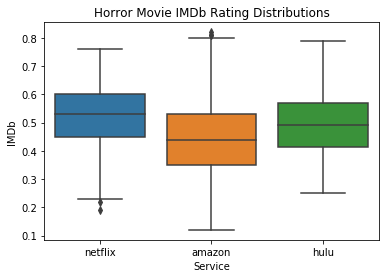

In [9]:
sns.boxplot(x = "Service", y = "IMDb", data= horror)
plt.title("Horror Movie IMDb Rating Distributions")
print(horror.drop(["RottenTomatoes"], axis=1).groupby("Service").mean())

         Title
Service       
amazon    1475
hulu       167
netflix    229


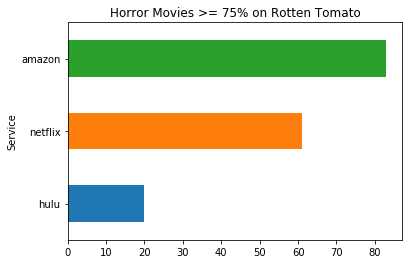

In [9]:
horror_rt75["Title"].groupby(by=horror_rt75["Service"]).count().sort_values().plot.barh()
plt.title("Horror Movies >= 75% on Rotten Tomato")
print(all_titles[all_titles["Genre"]=="horror"].drop(["RottenTomatoes","IMDb","Year","Genre"], axis=1).groupby("Service").count())

# Documentary

             IMDb
Service          
amazon   0.712477
hulu     0.713770
netflix  0.710864


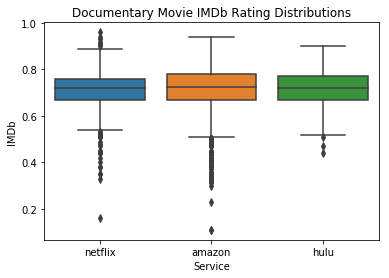

In [11]:
sns.boxplot(x = "Service", y = "IMDb", data= documentary)
plt.title("Documentary Movie IMDb Rating Distributions")
print(documentary.drop(["Year","RottenTomatoes"], axis=1).groupby("Service").mean())

         Title
Service       
amazon    1446
hulu       194
netflix    756


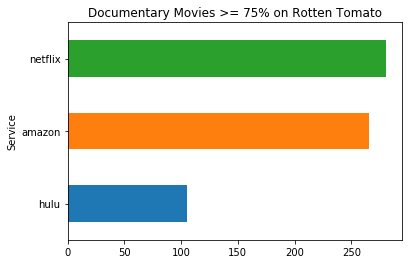

In [11]:
documentary_rt75["Title"].groupby(by=documentary_rt75["Service"]).count().sort_values().plot.barh()
plt.title("Documentary Movies >= 75% on Rotten Tomato")
print(all_titles[all_titles["Genre"]=="documentary"].drop(["RottenTomatoes","IMDb","Year","Genre"], axis=1).groupby("Service").count())

### Conclusion and closing notes: 

1. Amazon has more than double the movie inventory of Netflix, and nearly 6x Hulu's inventory
2. Critics and viewers agree: Netflix has the highest quality movie content of the bunch
3. 43% of Netflix's movie library is rated 75% or better on Rotten Tomatoes compared to only 20% of Amazon Prime's library. Overall, they have roughly the same amount of quality movie content